In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
y_train = train['Survived']

In [0]:
train.drop('Survived',axis = 1,inplace = True)

In [0]:
#merging both train and test data 
full = pd.concat([train,test])

In [0]:
full = full.reset_index()

In [0]:
#funtion to separate a title from names
def title(text):
    a = text.split(',')
    b = a[1].split('.')
    return b[0]

In [0]:
#making a new column title 
full['title'] = full['Name'].apply(title)

In [68]:
full.tail()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
1304,413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1306,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
1308,417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


In [13]:
# identifying missing data 
for col in full.columns:
  print("empty points in {} column are {} out of {}".format(col,sum(full[col].isnull()),full.shape[0]))

empty points in index column are 0 out of 1309
empty points in PassengerId column are 0 out of 1309
empty points in Pclass column are 0 out of 1309
empty points in Name column are 0 out of 1309
empty points in Sex column are 0 out of 1309
empty points in Age column are 263 out of 1309
empty points in SibSp column are 0 out of 1309
empty points in Parch column are 0 out of 1309
empty points in Ticket column are 0 out of 1309
empty points in Fare column are 1 out of 1309
empty points in Cabin column are 1014 out of 1309
empty points in Embarked column are 2 out of 1309
empty points in title column are 0 out of 1309


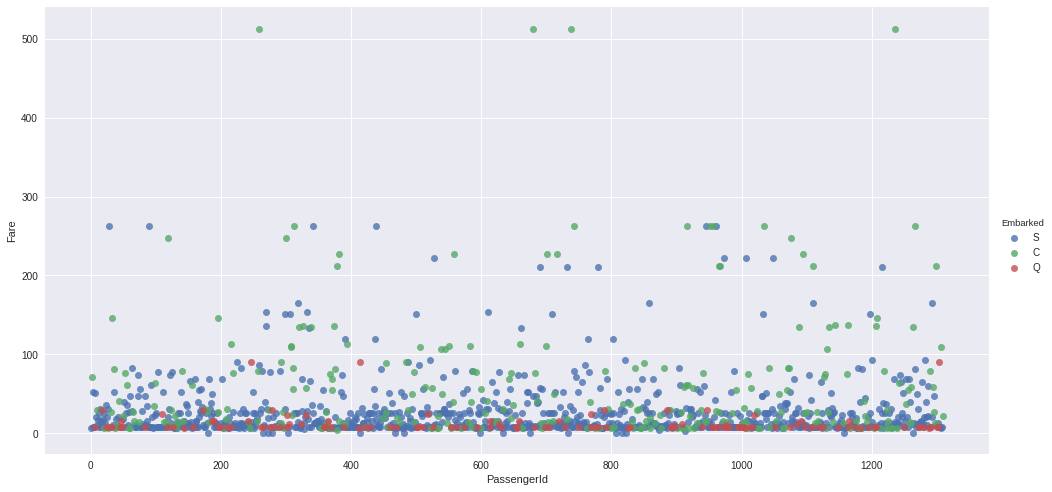

In [67]:

!pip install seaborn
import seaborn as sns
# plotting each person's ticket fare
sns.lmplot(x='PassengerId', y= 'Fare', data=full,
           fit_reg=False, # No regression line
           hue='Embarked',size = 7,  aspect=2)


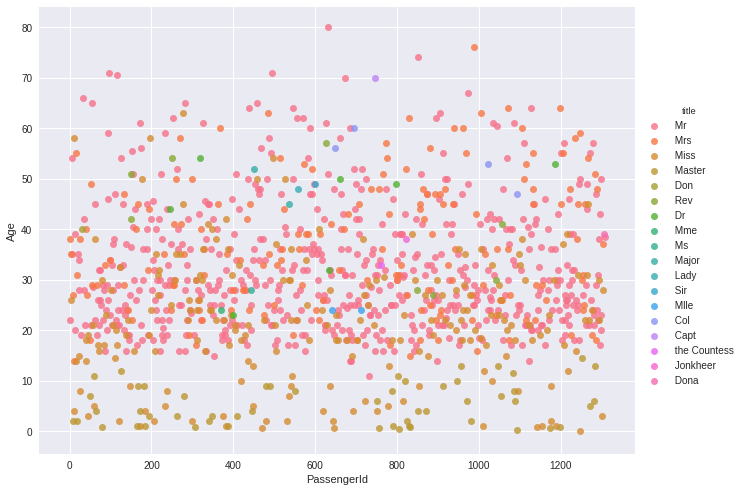

In [93]:
#title and age of a person may have some correlation let's see
ax = sns.lmplot(x = 'PassengerId',y = 'Age', data = full[full['Age'].isnull()==False], hue = 'title',fit_reg = False,size = 7,aspect = 1.3)


In [0]:
#filling age value according to title

for i in a:
  full.iloc[full[full['title'] == i].index,5] = full[full['title'] == i]['Age'].mean()

In [0]:
#Although there is some overlapping between different layers of titles
#taking average age per title for filling missing data seems like a good choice
a =  [' Capt', ' Col', ' Don', ' Dona', ' Dr', ' Jonkheer', ' Lady', ' Major', ' Master', ' Miss', ' Mlle', ' Mme', ' Mr', ' Mrs', ' Ms', ' Rev', ' Sir', ' the Countess']
for i in a:
  print("the average age of a person with title {} is {}".format(i,full[full['title']== i]['Age'].mean()))

In [17]:
for col in full.columns:
  print("empty points in column {}  are {} out of {}".format(col,sum(full[col].isnull()),full.shape[0]))

empty points in column index  are 0 out of 1309
empty points in column PassengerId  are 0 out of 1309
empty points in column Pclass  are 0 out of 1309
empty points in column Name  are 0 out of 1309
empty points in column Sex  are 0 out of 1309
empty points in column Age  are 0 out of 1309
empty points in column SibSp  are 0 out of 1309
empty points in column Parch  are 0 out of 1309
empty points in column Ticket  are 0 out of 1309
empty points in column Fare  are 1 out of 1309
empty points in column Cabin  are 1014 out of 1309
empty points in column Embarked  are 2 out of 1309
empty points in column title  are 0 out of 1309


In [143]:
set(full['Cabin'])

{'A10',
 'A11',
 'A14',
 'A16',
 'A18',
 'A19',
 'A20',
 'A21',
 'A23',
 'A24',
 'A26',
 'A29',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'A9',
 'B10',
 'B101',
 'B102',
 'B11',
 'B18',
 'B19',
 'B20',
 'B22',
 'B24',
 'B26',
 'B28',
 'B3',
 'B30',
 'B35',
 'B36',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B45',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B52 B54 B56',
 'B57 B59 B63 B66',
 'B58 B60',
 'B61',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C105',
 'C106',
 'C110',
 'C111',
 'C116',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C130',
 'C132',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C28',
 'C30',
 'C31',
 'C32',
 'C39',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C51',
 'C52',
 'C53',
 'C54',
 'C55 C57',
 'C6',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C80',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C89',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C97',
 'C

In [0]:
#since cabin comprises of deck(A,B,C,D...) and room no.(1,2,3...) ,separating deck from cabin 
def cabin(text):
    a = text[0]
    return a  

In [0]:
full['Cabin_initial'] = full[full['Cabin'].isnull()== False]['Cabin'].apply(cabin)

In [0]:
full  = full.loc[full['Cabin_initial'].isnull() == False]

In [ ]:
cabin_data = full[full['Cabin'].isnull== False]

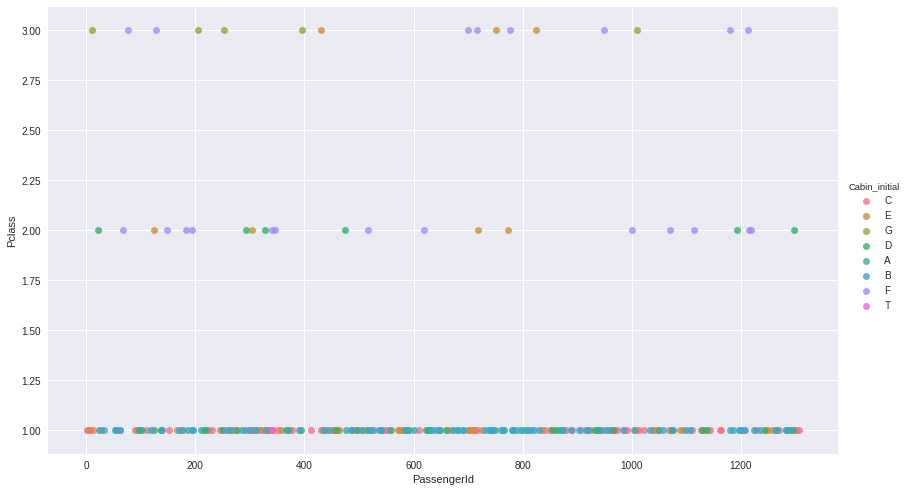

In [175]:
sns.lmplot(x = 'PassengerId',y = 'Pclass',data = cabin_data, hue = 'Cabin_initial', fit_reg = False,size = 7, aspect = 1.7)

In [178]:
set(cabin_data[cabin_data['Pclass']== 3]['Cabin_initial'])

{'E', 'F', 'G'}

In [ ]:
#we can see that only class 3 passengers were present in deck E, F and G

In [22]:
cabin_data.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Cabin_initial
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36.994118,1,0,PC 17599,71.2833,C85,C,Mrs,C
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36.994118,1,0,113803,53.1000,C123,S,Mrs,C
6,6,7,1,"McCarthy, Mr. Timothy J",male,32.252151,0,0,17463,51.8625,E46,S,Mr,E
10,10,11,3,"Sandstrom, Miss. Marguerite Rut",female,21.774238,1,1,PP 9549,16.7000,G6,S,Miss,G
11,11,12,1,"Bonnell, Miss. Elizabeth",female,21.774238,0,0,113783,26.5500,C103,S,Miss,C


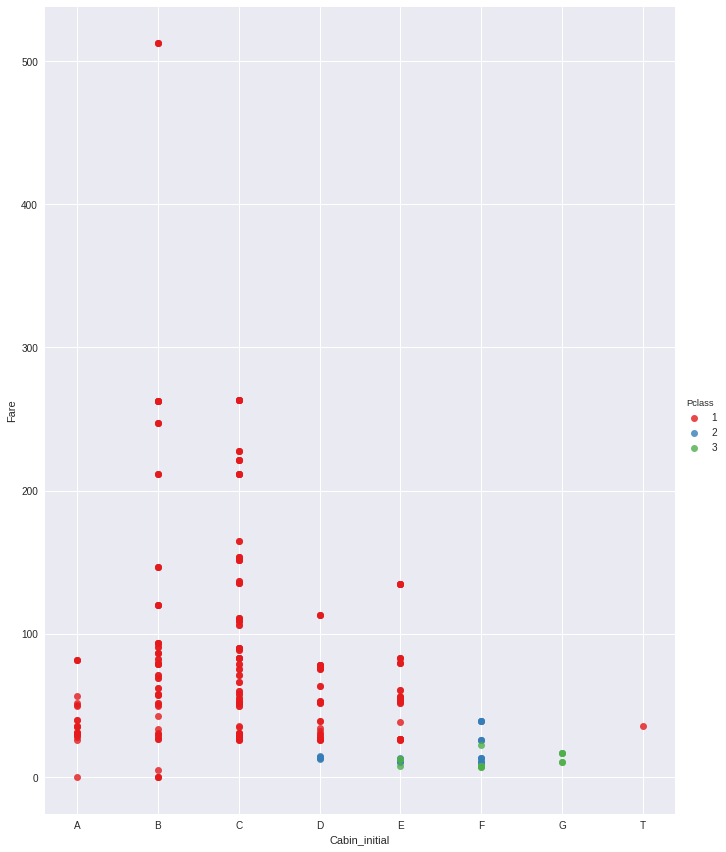

In [46]:
# distribution of ticket fare w.r.t deck
sns.lmplot(x = 'Cabin_initial', y = 'Fare',data = full, hue = 'Pclass', size = 12, aspect = 0.8, fit_reg = False,palette="Set1")

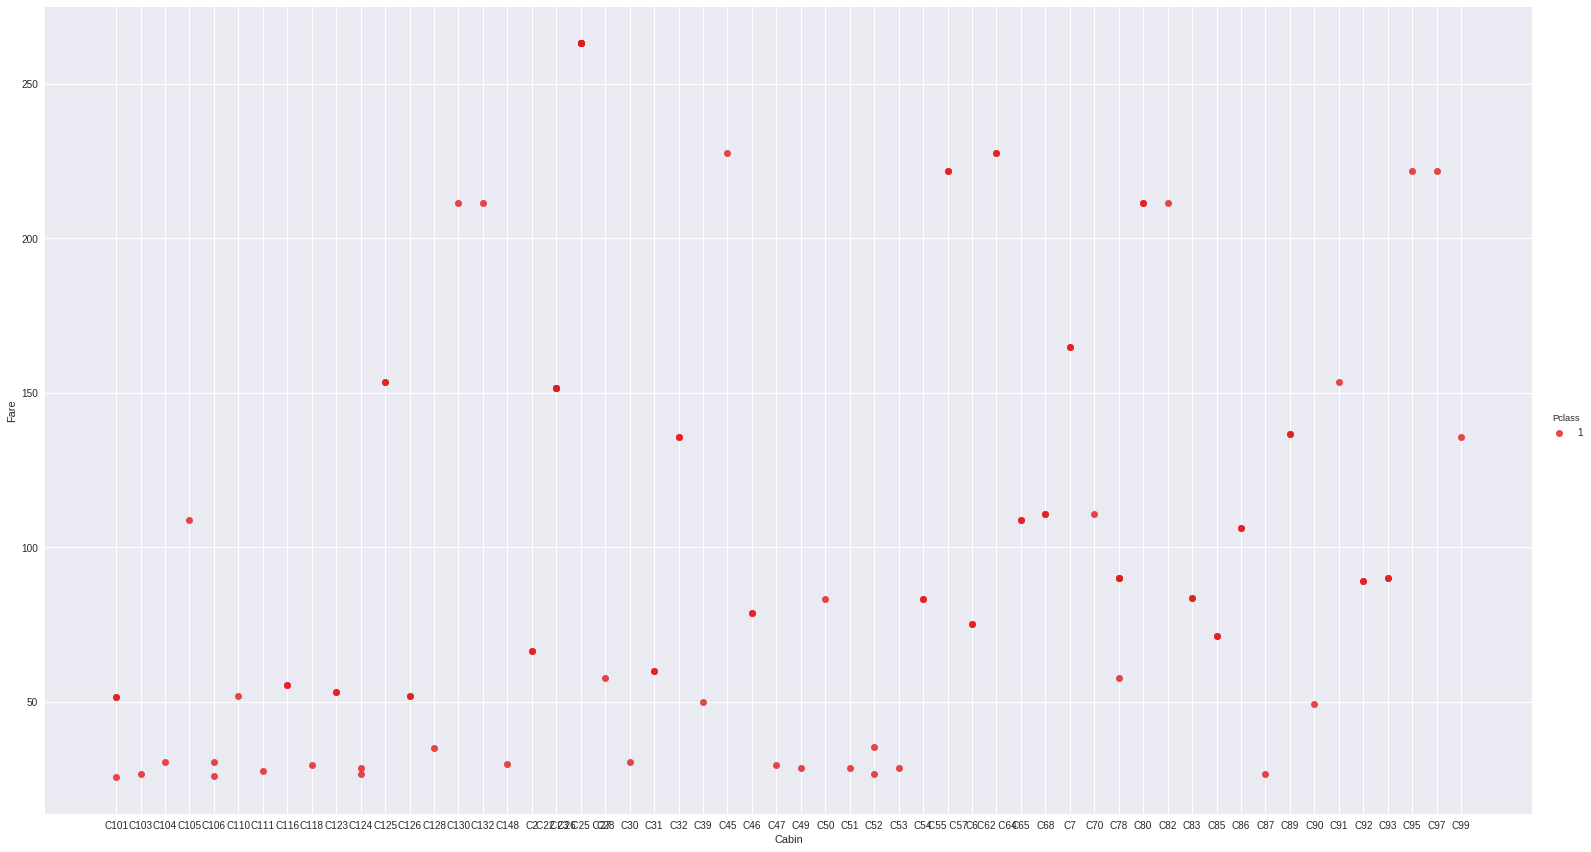

In [49]:
#fare and cabin distribution for deck C
sns.lmplot(x = 'Cabin', y = 'Fare',data = full[full['Cabin_initial']== 'C'], hue = 'Pclass', size = 12, aspect = 1.8, fit_reg = False,palette="Set1")

In [ ]:
# from above graph it is evident that passengers with both high and low priced tikcets were in Deck, all 1st class tickets 
#deck A and B also must have the same case 

In [0]:
#funtion for separating room number from cabin number
def room(text):
    a = text.split()
    a = a[0]
    if len(a)>1:
        a = int(a[1:])
    else:
        a = 0
    return a

In [0]:
full["room_no"] = full[full["Cabin"].isnull()==False]["Cabin"].apply(room)

In [64]:
full[full['Cabin'].isnull()== False]['room_no']

1        85.0
3       123.0
6        46.0
10        6.0
11      103.0
21       56.0
23        6.0
27       23.0
31       78.0
52       33.0
54       30.0
55       52.0
61       28.0
62       83.0
66       33.0
75        0.0
88       23.0
92       31.0
96        5.0
97       10.0
102      26.0
110     110.0
118      58.0
123     101.0
124      26.0
128       0.0
136      47.0
137     123.0
139      86.0
148       2.0
        ...  
1192      0.0
1196     26.0
1197     22.0
1199     69.0
1205     32.0
1207     78.0
1212      0.0
1213      2.0
1217      4.0
1222     18.0
1226    106.0
1234     51.0
1241     10.0
1246     60.0
1247    101.0
1255     50.0
1262     39.0
1263     52.0
1265     34.0
1269     39.0
1281     24.0
1282     28.0
1286     31.0
1288     41.0
1291      7.0
1295     40.0
1296     38.0
1298     80.0
1302     78.0
1305    105.0
Name: room_no, Length: 295, dtype: float64

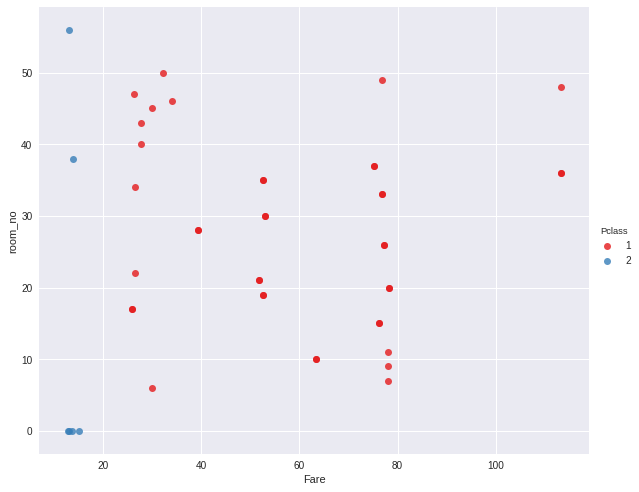

In [69]:
#deck D has only class 1 and 2 passengers, since no relation between room numbers and fare the ticket price must be related to region and room size
sns.lmplot(x = 'Fare', y = 'room_no',data = full[full['Cabin_initial']== 'D'], hue = 'Pclass', size = 7, aspect = 1.2, fit_reg = False,palette="Set1")

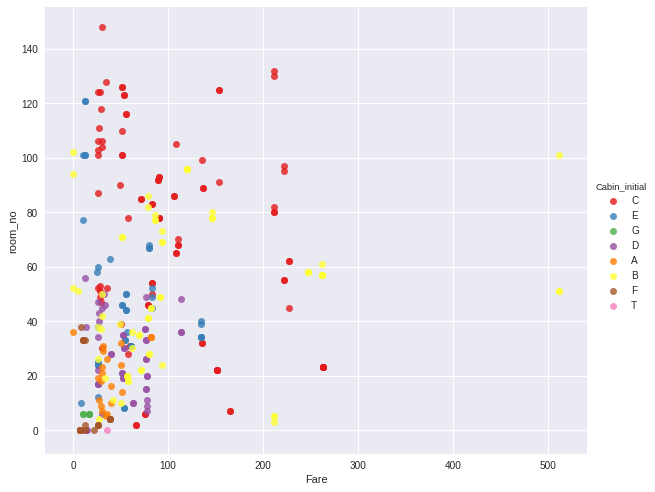

In [70]:
#rrom no. and fare of different decks
sns.lmplot(x = 'Fare', y = 'room_no',data = full[full['Cabin_initial'].isnull()== False], hue = 'Cabin_initial', size = 7, aspect = 1.2, fit_reg = False,palette="Set1")